# Speed dating experiment

## What influences love at first sight? Or, at least, love in the first four minutes?

The [dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment) was compiled by Columbia Business School professors Ray Fisman and Sheena Iyengar for their paper *Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment*.

Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('SpeedDatingData.csv')

### Style

In [3]:
blue = '#1e1eff'
purple = '#7c7bfb'
salmon = '#ff9696'
red = '#ff5a5a'
pie_chart_colors = [red, blue]

In [4]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [5]:
# Hiding warnings for better appereance (this was added after checking all warnings)
import warnings
warnings.filterwarnings(action = "ignore")

## Data preprocessing
The original structure of data is a bit complicated and joins are needed if full data about a single date needed. So we decided to preprocess it so, that no joins will be needed. We achieved format which is easier to work with.

### Selecting and renaming attributes
Every row consists of data about both people attending the speed date. Partner's data is suffixed with *'_partners'*.

Partner's preffered attributes are suffixed with *'_pref'* and the person's own attributes are suffixed with *'_me'*.

#### Personal data
Personal data about the date participant and preffered partner's attribute.

In [6]:
personal_data = data[[
    'iid',
    'gender',
    'age',
    'wave',
    'field',
    'field_cd',
    'race',
    'imprace',
    'imprelig',
    'from',
    'income',
    'goal',
    'date',
    'go_out',
    'career',
    'career_c',
    'sports',
    'tvsports',
    'exercise',
    'dining',
    'museums',
    'art',
    'hiking',
    'gaming',
    'clubbing',
    'reading',
    'tv',
    'theater',
    'movies',
    'concerts',
    'music',
    'shopping',
    'yoga',
    'attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1',
    'attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1',
    'you_call','them_cal',
    'date_3'
]]

personal_data.drop_duplicates(inplace=True)
personal_data = personal_data.rename(columns=
    {'attr1_1':'attr_pref',
     'sinc1_1':'sinc_pref',
     'intel1_1':'intel_pref',
     'fun1_1':'fun_pref',
     'amb1_1':'amb_pref',
     'shar1_1':'shar_pref',
     'attr3_1':'attr_me',
     'sinc3_1':'sinc_me',
     'intel3_1':'intel_me',
     'fun3_1':'fun_me',
     'amb3_1':'amb_me' 
    }
)

#### Dating data
Information about the date.

In [7]:
dating_data = data[[
    'iid','id','pid',
    'samerace',
    'match',
    'int_corr',
    'dec_o',
    'dec',
    'like'    
]]

dating_data.drop_duplicates(inplace=True)
dating_data = dating_data.rename(columns=
    {
        'dec_o':'dec_partner',
        'like':'iid_like_pid'
    }
)

In [8]:
df = dating_data.merge(personal_data, how='left', on='iid')
df = df.merge(personal_data, how='left', left_on='pid', right_on='iid', suffixes=['','_partners']) 

In [9]:
# Saving cleared data
df.to_csv("dataset.csv")

## EDA

In [10]:
print(f'Number of records in dataset: {len(df)}')

Number of records in dataset: 8378


In [11]:
participants_count = df['iid'].nunique()
print(f'Number of participants in speed dating experiment: { participants_count }')

Number of participants in speed dating experiment: 551


In [12]:
matches_count = df['match'].sum()
print(f'Number of matches in speed dating experiment: { matches_count }, which is { round(matches_count / len(df)*100, 2) }%.')

Number of matches in speed dating experiment: 1380, which is 16.47%.


### Participants' gender ratio

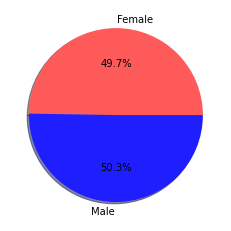

In [13]:
unique_participants_df = df.drop_duplicates(subset=['iid'])

gender = [len(unique_participants_df[unique_participants_df['gender'] == 0]), len(unique_participants_df[unique_participants_df['gender'] == 1])]
plt.pie(gender, labels = ['Female', 'Male'], shadow = True, autopct='%1.1f%%', colors = pie_chart_colors)
plt.show() 

### Matches ratio

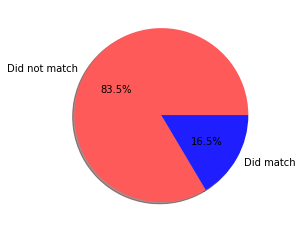

In [14]:
matches = [len(df[df['match'] == 0]), len(df[df['match'] == 1])]
plt.pie(matches, labels = ['Did not match', 'Did match'], shadow = True, autopct='%1.1f%%', colors = pie_chart_colors)
plt.show() 

### Participants' age

In [15]:
min(df['age'])

18.0

In [16]:
max(df['age'])

55.0

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

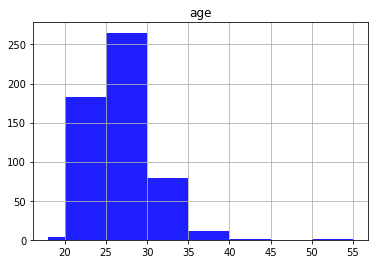

In [17]:
age_df = df[['iid', 'age']].drop_duplicates()

age_df.drop(columns = ['iid']).hist(bins=[18, 20, 25, 30, 35, 40, 45, 50, 55], figsize = (6, 4), color = blue)

#### Difference in matched participants' age

In [18]:
matched_df = df[df['match'] == 1]

matched_df['age_diff'] = abs(matched_df['age'] - matched_df['age_partners'])

array([[<AxesSubplot:title={'center':'age_diff'}>]], dtype=object)

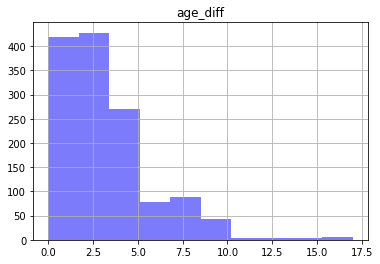

In [19]:
matched_df[[
    'age_diff'
]].hist(figsize = (6, 4), color = purple)

### Matched participants' race

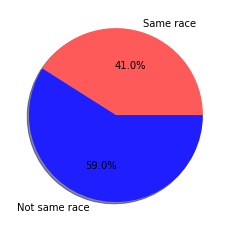

In [20]:
same_race_match_count = len(matched_df[matched_df['samerace'] == 1])
not_same_race_match_count = len(matched_df[matched_df['samerace'] == 0])

race_match = [same_race_match_count, not_same_race_match_count]
plt.pie(race_match, labels = ['Same race', 'Not same race'], shadow = True, autopct='%1.1f%%', colors = pie_chart_colors)
plt.show() 

In [21]:
def advanced_pie_chart(data, labels, fig_size):
    fig1, ax1 = plt.subplots(figsize = fig_size)
    fig1.subplots_adjust(0.3, 0, 1, 1)

    theme = plt.get_cmap('bwr')
    ax1.set_prop_cycle("color", [theme(1. * i / len(data)) for i in range(len(data))])

    _, _ = ax1.pie(data, startangle=90)

    ax1.axis('equal')

    total = sum(data)
    plt.legend(
        loc='upper left',
        labels=['%s, %1.1f%%' % (
            l, (float(s) / total) * 100) for l, s in zip(labels, data)],
        prop={'size': 17},
        bbox_to_anchor=(0.0, 1),
        bbox_transform=fig1.transFigure
    )

    plt.show()

### Date goals

In [22]:
goal_frequency = np.array(df['goal'].value_counts().sort_index())

    
labels = ['Seemed like a fun night out', 'To meet new people', 'To get a date', 'Looking for a serious relationship', 
          'To say I did it', 'Other']
goals = pd.Series(goal_frequency, labels)
goals.sort_values()

Looking for a serious relationship     301
Other                                  419
To say I did it                        510
To get a date                          631
To meet new people                    3012
Seemed like a fun night out           3426
dtype: int64

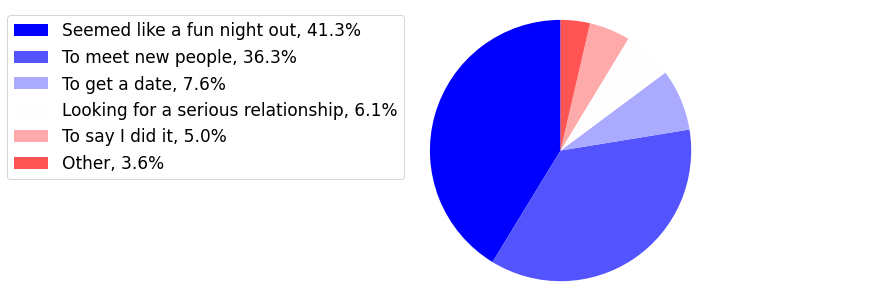

In [23]:
goal_frequency = np.array(df['goal'].value_counts().sort_index())

    
labels = ['Seemed like a fun night out', 'To meet new people', 'To get a date', 'Looking for a serious relationship', 
          'To say I did it', 'Other']

goals = pd.Series(goal_frequency, labels).sort_values(ascending=False)

advanced_pie_chart(goals, labels, (12, 4))

### Participants' career

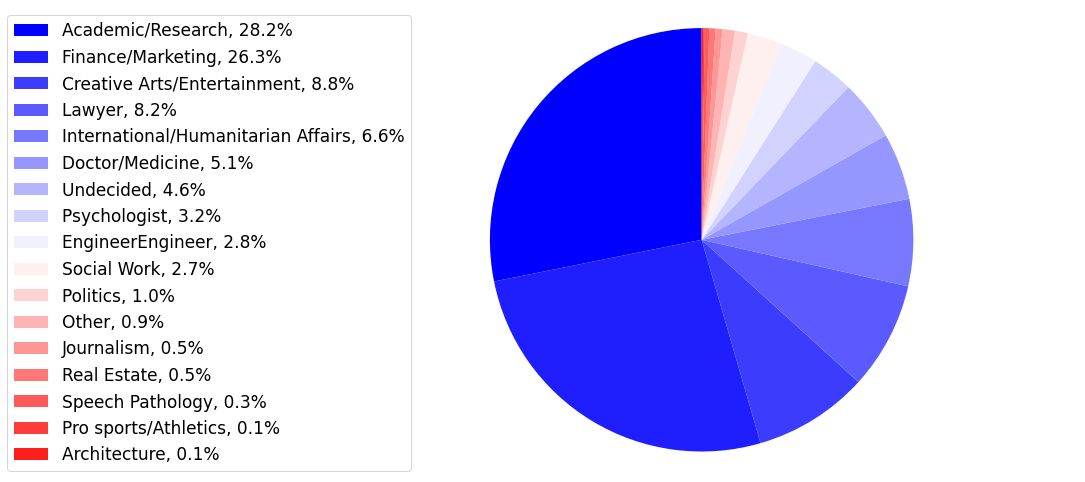

In [24]:
career_frequency = np.array(df['career_c'].value_counts().sort_index())
    
labels = ['Lawyer', 'Academic/Research', 'Psychologist', 'Doctor/Medicine', 'EngineerEngineer', 'Creative Arts/Entertainment',
          'Finance/Marketing', 'Real Estate', 'International/Humanitarian Affairs', 'Undecided', 'Social Work', 'Speech Pathology',
          'Politics', 'Pro sports/Athletics', 'Other', 'Journalism', 'Architecture']

career = pd.Series(career_frequency, labels).sort_values(ascending=False)

advanced_pie_chart(career, career.index, (15, 6.5))

### How often participatns go out, date

#### How often participatns go out

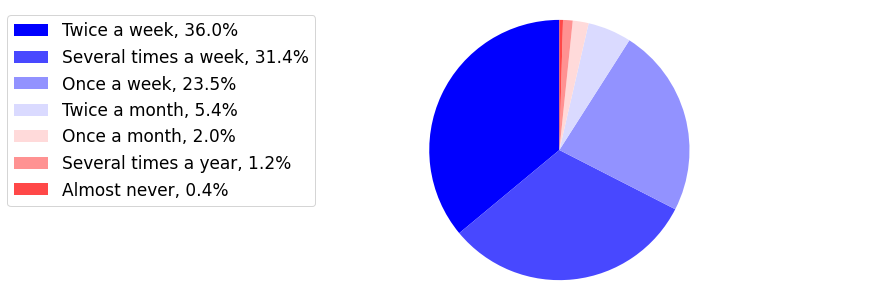

In [25]:
go_out_frequency = np.array(df['go_out'].value_counts().sort_index())
    
labels = ['Several times a week', 'Twice a week', 'Once a week', 'Twice a month', 'Once a month', 'Several times a year',
          'Almost never']

go_out = pd.Series(go_out_frequency, labels).sort_values(ascending=False)

advanced_pie_chart(go_out, go_out.index, (12, 4))

#### How often participatns date

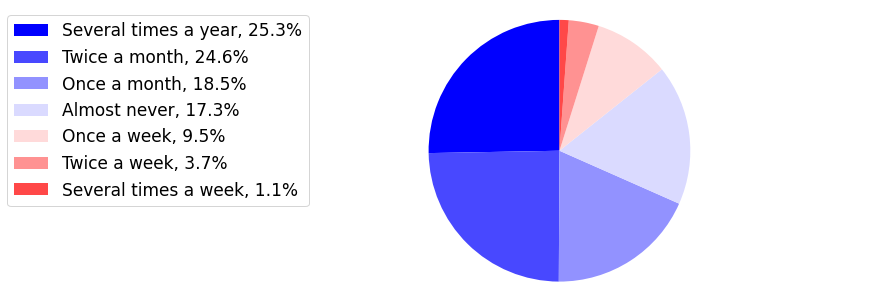

In [26]:
date_frequency = np.array(df['date'].value_counts().sort_index())

date = pd.Series(date_frequency, labels).sort_values(ascending=False)

advanced_pie_chart(date, date.index, (12, 4))

In [27]:
matched_df['date_diff'] = abs(matched_df['date'] - matched_df['date_partners'])
matched_df['go_out_diff'] = abs(matched_df['go_out'] - matched_df['go_out_partners'])

array([[<AxesSubplot:title={'center':'date_diff'}>,
        <AxesSubplot:title={'center':'go_out_diff'}>]], dtype=object)

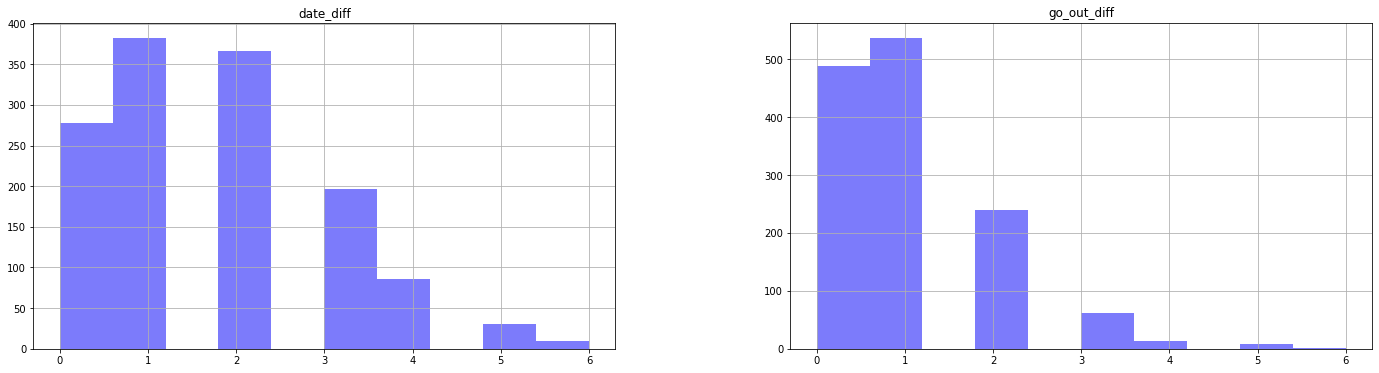

In [28]:
matched_df[[
    'date_diff', 'go_out_diff'
]].hist(figsize=(24, 6), color = purple)

### How many times partners has participant contacted to set up a date since the speed dating 

array([[<AxesSubplot:title={'center':'you_call'}>]], dtype=object)

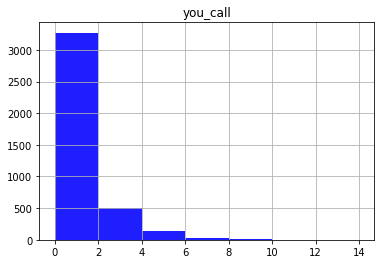

In [29]:
df[[
    'you_call'
]].hist(figsize = (6, 4), bins=[0, 2, 4, 6, 8, 10, 12, 14], color = blue)

### How many partners have contacted the participant

array([[<AxesSubplot:title={'center':'them_cal'}>]], dtype=object)

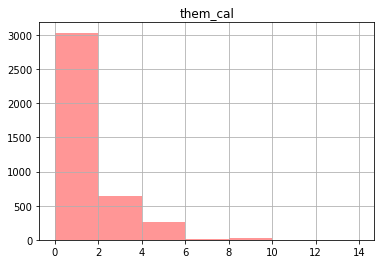

In [30]:
df[[
    'them_cal'
]].hist(figsize = (6, 4), bins=[0, 2, 4, 6, 8, 10, 12, 14], color = salmon)

### Do participants which go out more contact partners to set up a date more?

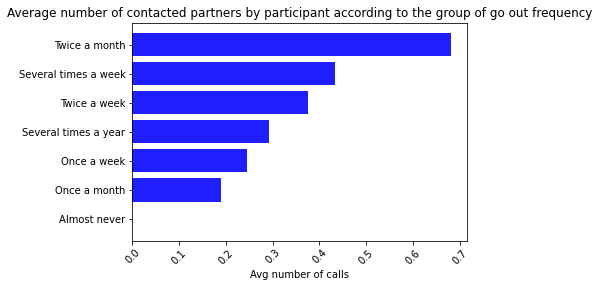

In [31]:
labels = ['Several times a week', 'Twice a week', 'Once a week', 'Twice a month', 'Once a month', 'Several times a year',
          'Almost never']
avg_calls = []

for i in range(1, 8):
    tmp_df = df[df['go_out'] == i]
    # Append avg number of calls for the group
    avg_calls.append(tmp_df['you_call'].sum()/len(tmp_df))
    
calls = pd.Series(avg_calls, labels).sort_values(ascending=True)
    
plt.barh(calls.index, calls, color = blue)
plt.title('Average number of contacted partners by participant according to the group of go out frequency')
plt.xlabel('Avg number of calls')
plt.xticks(rotation = 45)
plt.show()

### Do participants which date more contact partners to set up a date more?

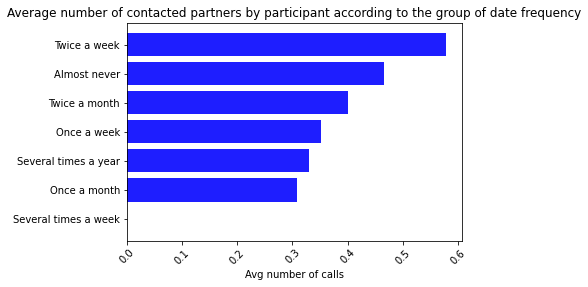

In [32]:
labels = ['Several times a week', 'Twice a week', 'Once a week', 'Twice a month', 'Once a month', 'Several times a year',
          'Almost never']
avg_calls = []

for i in range(1, 8):
    tmp_df = df[df['date'] == i]
    # Append avg number of calls for the group
    avg_calls.append(tmp_df['you_call'].sum()/len(tmp_df))

calls = pd.Series(avg_calls, labels).sort_values(ascending=True)
    
plt.barh(calls.index, calls, color = blue)
plt.title('Average number of contacted partners by participant according to the group of date frequency')
plt.xlabel('Avg number of calls')
plt.xticks(rotation = 45)
plt.show()

### Do participants of some career group call more to set up a date?

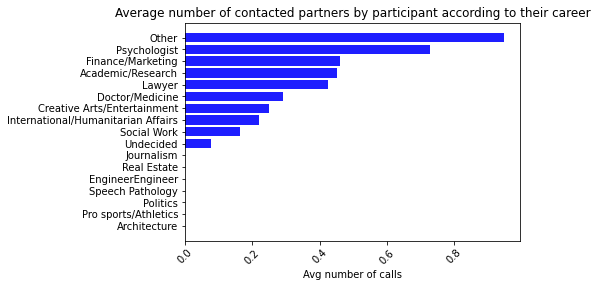

In [33]:
labels = ['Lawyer', 'Academic/Research', 'Psychologist', 'Doctor/Medicine', 'EngineerEngineer', 'Creative Arts/Entertainment',
          'Finance/Marketing', 'Real Estate', 'International/Humanitarian Affairs', 'Undecided', 'Social Work', 'Speech Pathology',
          'Politics', 'Pro sports/Athletics', 'Other', 'Journalism', 'Architecture']
avg_calls = []

for i in range(1, 18):
    tmp_df = df[df['career_c'] == i]
    # Append avg number of calls for the group
    avg_calls.append(tmp_df['you_call'].sum()/len(tmp_df))

calls = pd.Series(avg_calls, labels).sort_values(ascending=True)
    
plt.barh(calls.index, calls, color = blue)
plt.title('Average number of contacted partners by participant according to their career')
plt.xlabel('Avg number of calls')
plt.xticks(rotation = 45)
plt.show()

### Have more attractive participant received more calls?

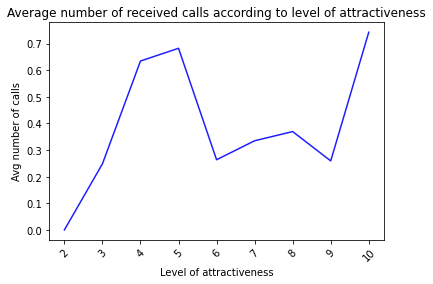

In [34]:
labels = list(range(1, 11, 1))
avg_calls = []

for i in range(1, 11):
    tmp_df = df[df['attr_me'] == i]
    # Append avg number of calls for the group
    avg_calls.append(tmp_df['you_call'].sum()/len(tmp_df))
    
plt.plot(labels, avg_calls, color = blue)
plt.title('Average number of received calls according to level of attractiveness')
plt.xlabel('Level of attractiveness')
plt.ylabel('Avg number of calls')
plt.xticks(rotation = 45)
plt.show()

### How participants measure up themselves and what are their preferences
Participant measured up themselves and preferrences on their partner. They rated importance of following 6 attributes:
 - attr - attractive
 - sinc - sincere
 - fun - funny
 - intel - intelligent
 - amb - ambitious
 - shar - having shared interests/hobbies

#### Participant measured up themself
On a scale of 1-10 (1= awful and 10=great).  

array([[<AxesSubplot:title={'center':'attr_me'}>,
        <AxesSubplot:title={'center':'sinc_me'}>],
       [<AxesSubplot:title={'center':'fun_me'}>,
        <AxesSubplot:title={'center':'intel_me'}>],
       [<AxesSubplot:title={'center':'amb_me'}>, <AxesSubplot:>]],
      dtype=object)

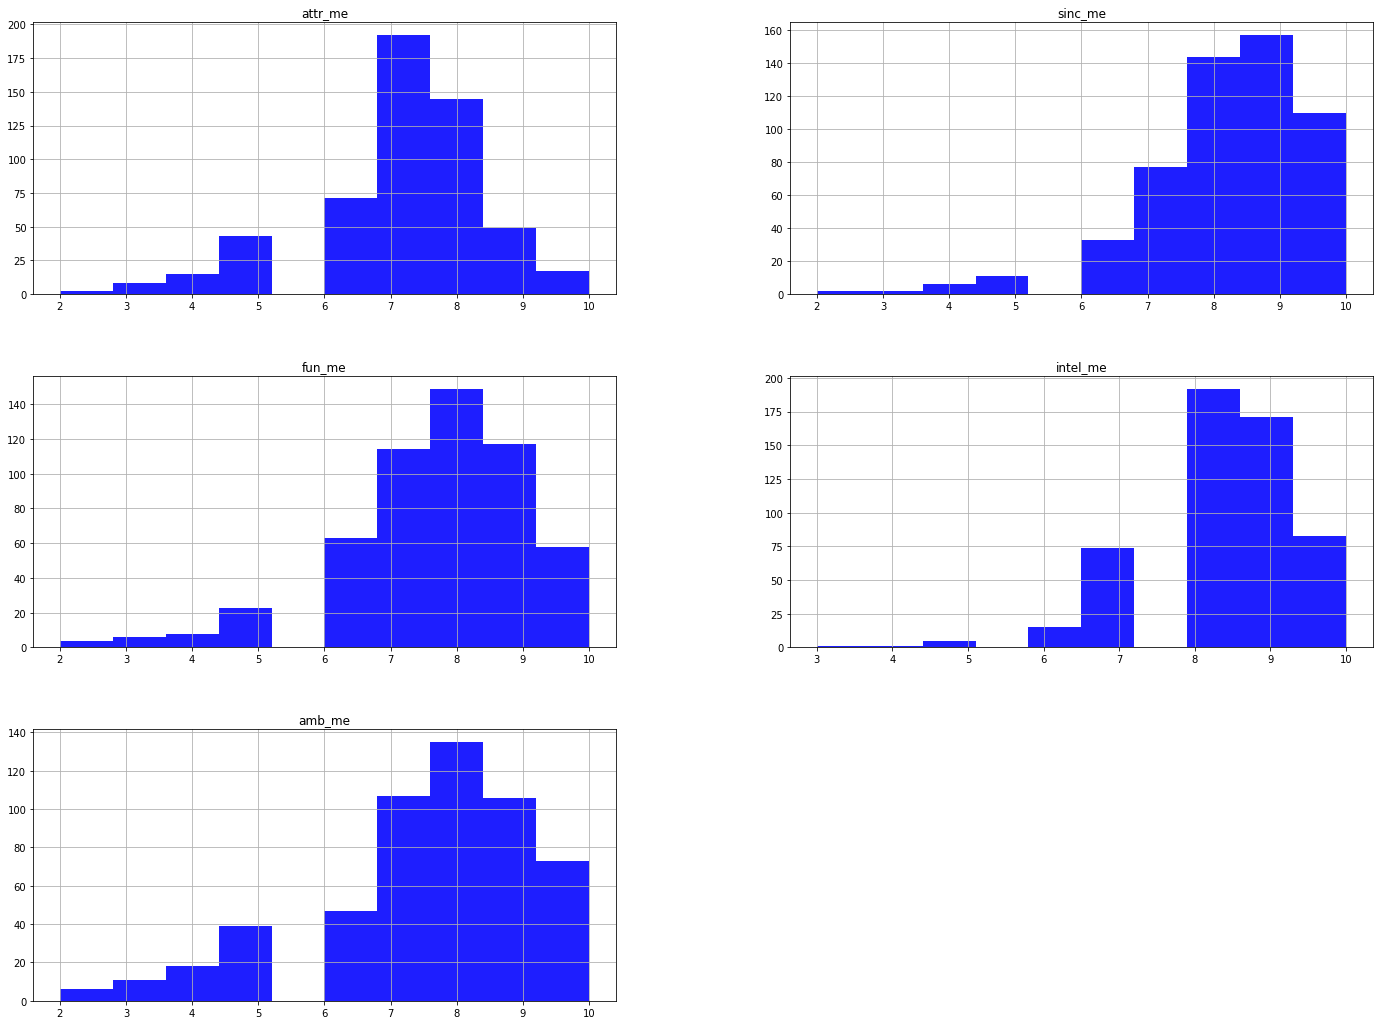

In [35]:
attributes_me_df = df[['iid',
    'attr_me','sinc_me','fun_me','intel_me','amb_me'
]].drop_duplicates()

attributes_me_df.drop(columns = ['iid']).hist(figsize = (24, 18), color = blue)

#### Participant rated how are basic partner's attributes important to them
On a scale of 1-10 (1=not at all important, 10=extremely important)

array([[<AxesSubplot:title={'center':'attr_pref'}>,
        <AxesSubplot:title={'center':'sinc_pref'}>],
       [<AxesSubplot:title={'center':'fun_pref'}>,
        <AxesSubplot:title={'center':'intel_pref'}>],
       [<AxesSubplot:title={'center':'amb_pref'}>,
        <AxesSubplot:title={'center':'shar_pref'}>]], dtype=object)

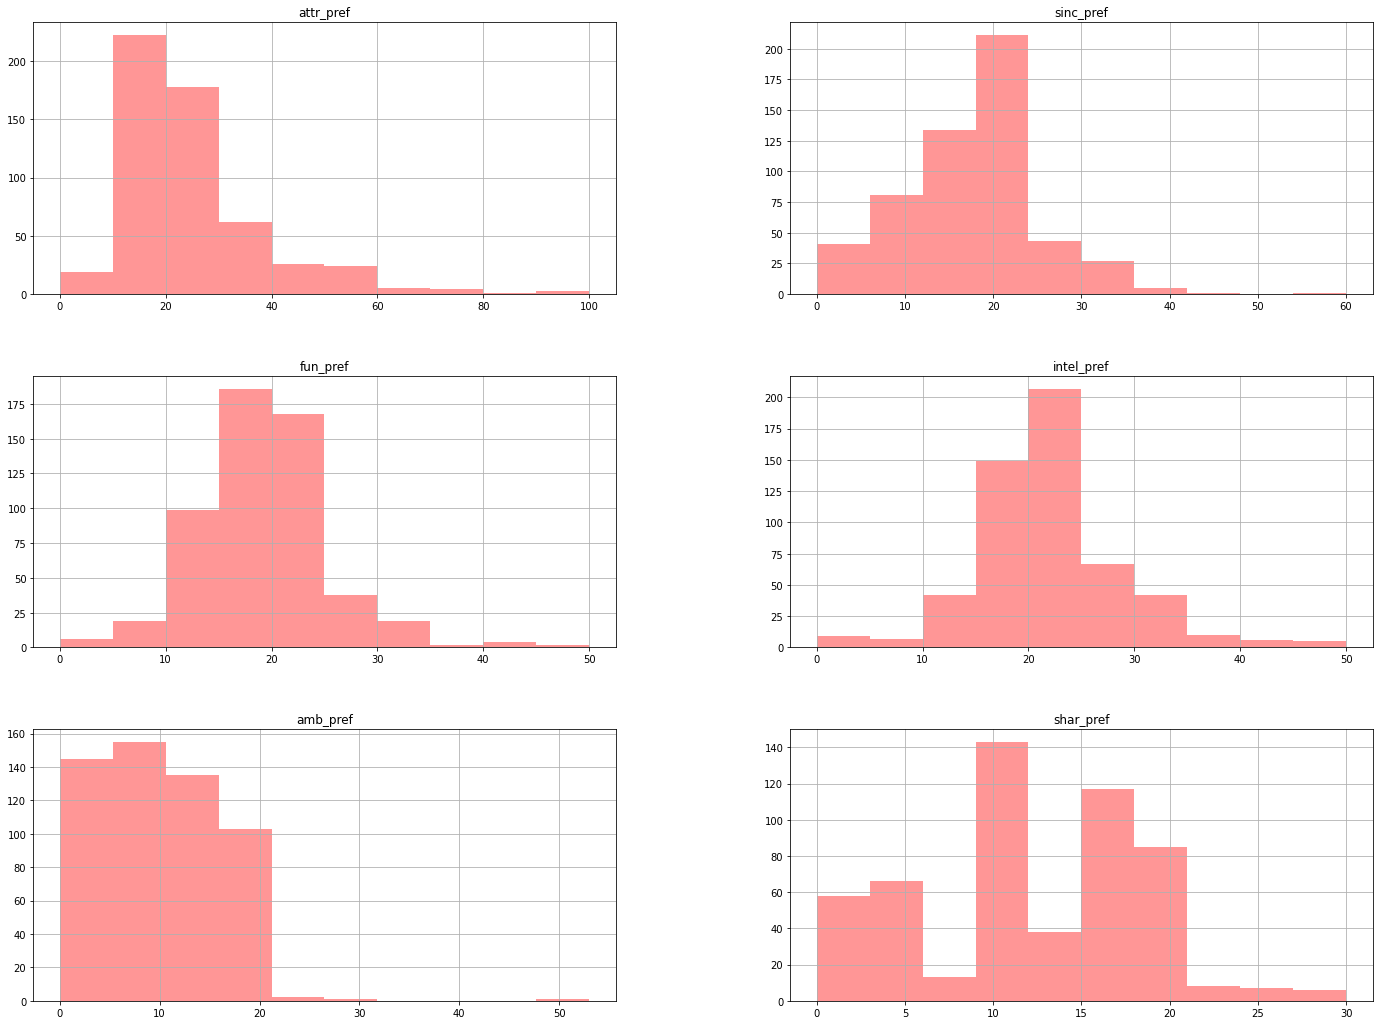

In [36]:
attributes_pref_df = df[[ 'iid',
    'attr_pref','sinc_pref','fun_pref','intel_pref','amb_pref','shar_pref'
]].drop_duplicates()

attributes_pref_df.drop(columns = ['iid']).hist(figsize = (24, 18), color = salmon)

## Comparision features

### How big is the difference between participant's attributes and their preferences to partner?
On a scale of 0-9 (0=no difference, 9=extreme difference)

In [37]:
df['attr_me_my_partner_diff'] = df['attr_me'] - df['attr_me_partners']
df['sinc_me_my_partner_diff'] = df['sinc_me'] - df['sinc_me_partners']
df['fun_me_my_partner_diff'] = df['fun_me'] - df['fun_me_partners']
df['intel_me_my_partner_diff'] = df['intel_me'] - df['intel_me_partners']
df['amb_me_my_partner_diff'] = df['amb_me'] - df['amb_me_partners']

array([[<AxesSubplot:title={'center':'attr_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'sinc_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'fun_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'intel_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'amb_me_my_partner_diff'}>,
        <AxesSubplot:>]], dtype=object)

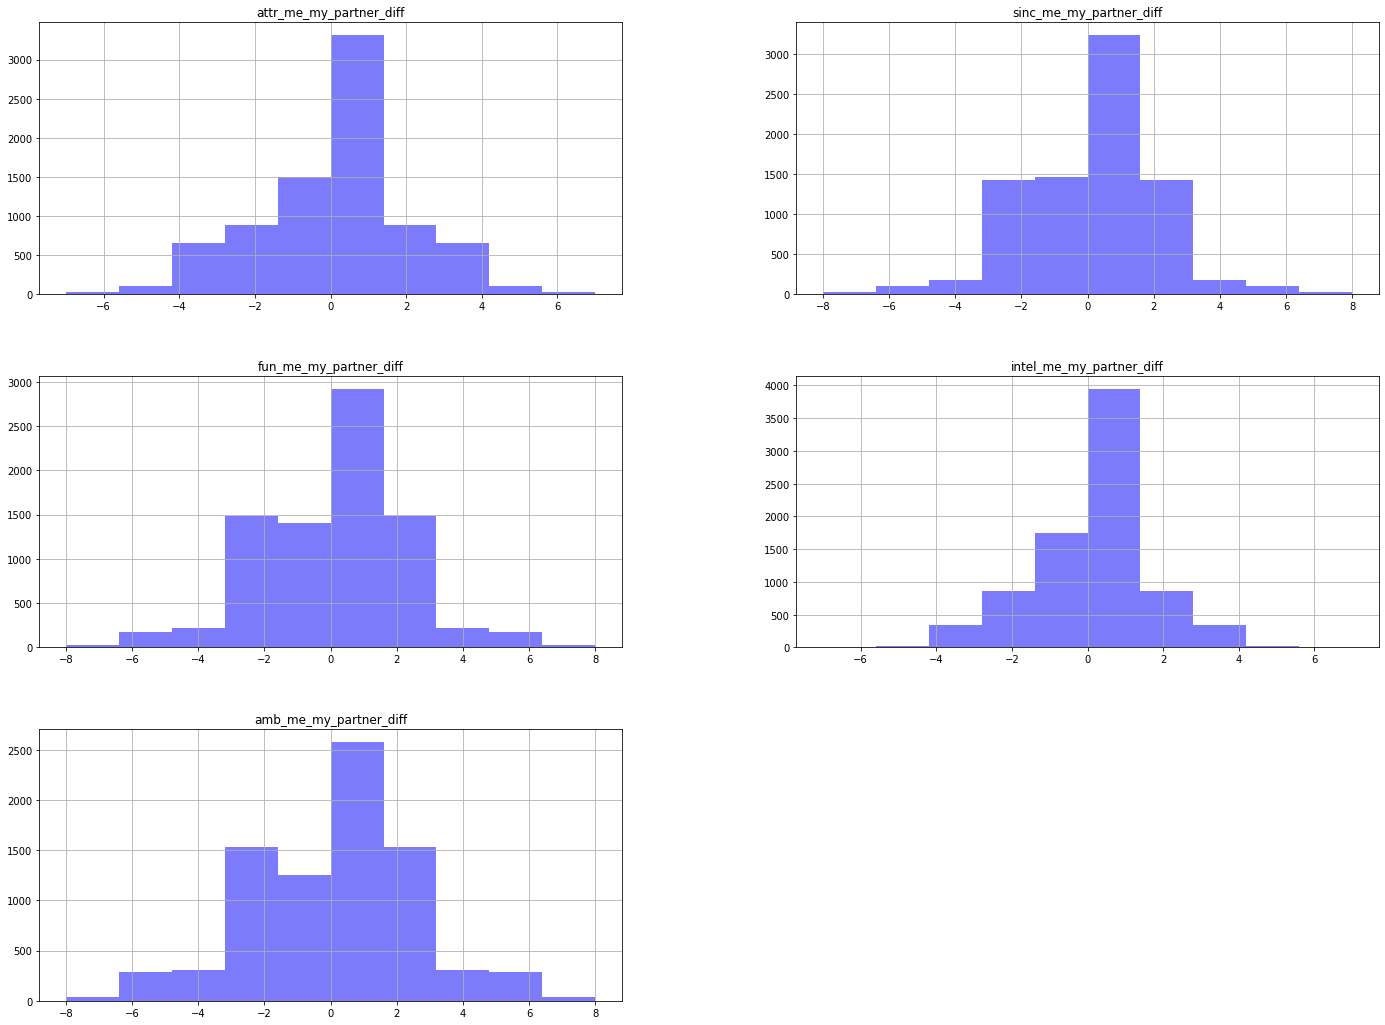

In [38]:
comparision_df = df[['iid','pid',
    'attr_me_my_partner_diff','sinc_me_my_partner_diff','fun_me_my_partner_diff','intel_me_my_partner_diff',
    'amb_me_my_partner_diff'
]].drop_duplicates()

comparision_df[[
    'attr_me_my_partner_diff','sinc_me_my_partner_diff','fun_me_my_partner_diff','intel_me_my_partner_diff',
    'amb_me_my_partner_diff'
]].hist(figsize=(24,18), color = purple)

### How big is the difference between participant's attributes and their matched partner attributes? (Both measured up themselves)
On a scale of 0-9 (0=no difference, 9=extreme difference)

array([[<AxesSubplot:title={'center':'attr_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'sinc_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'fun_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'intel_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'amb_me_my_partner_diff'}>,
        <AxesSubplot:>]], dtype=object)

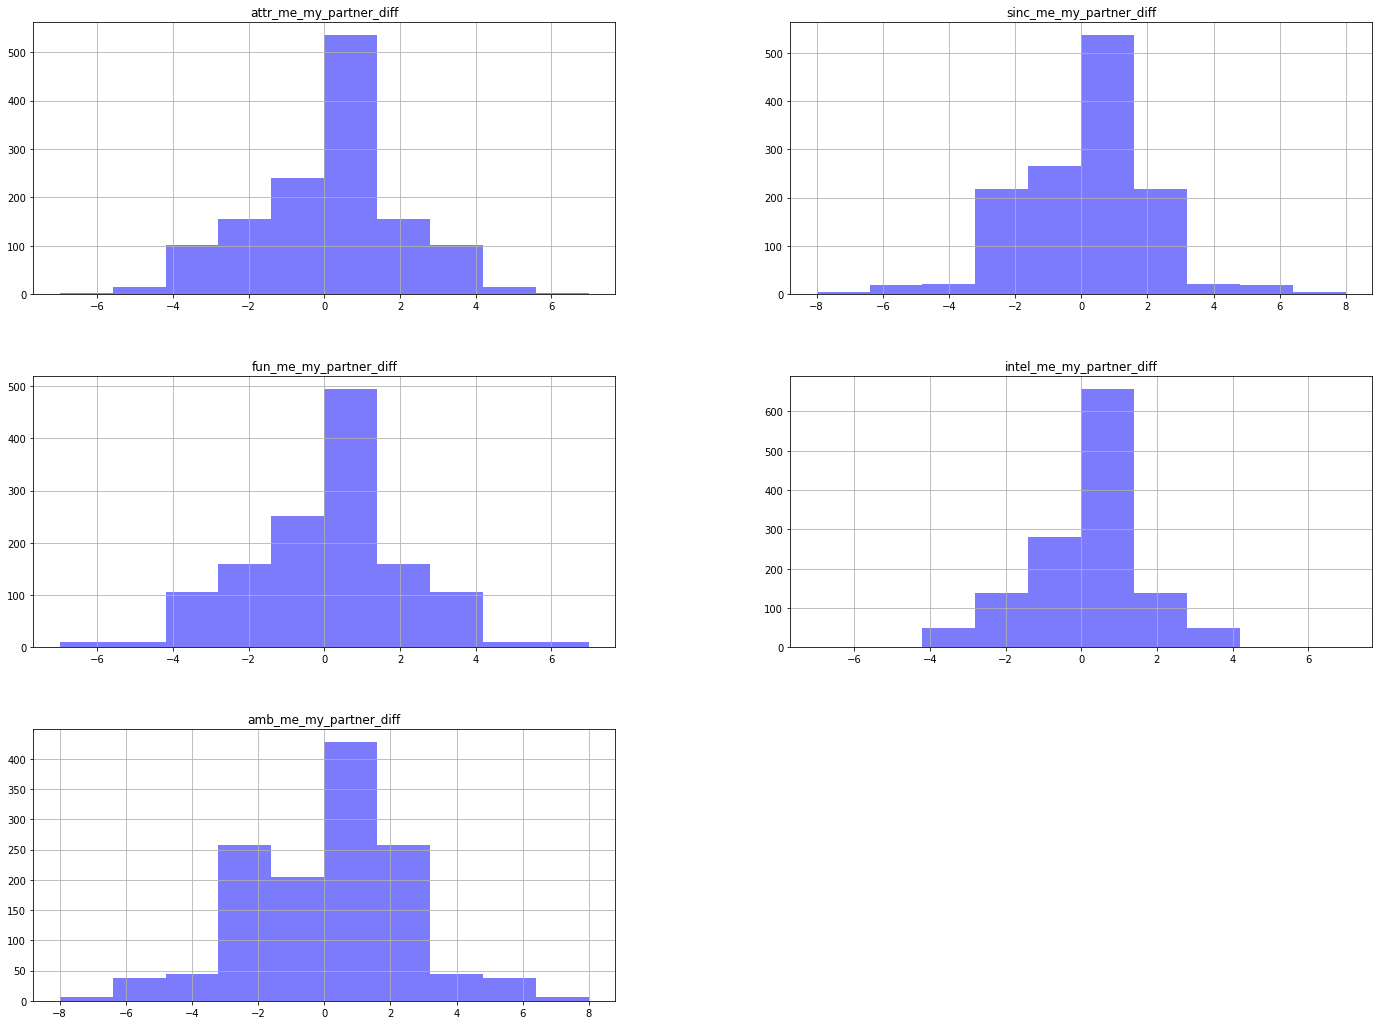

In [39]:
df_temp_match = df[df['match']==1]

df_temp_not_match = df[df['match']==0]

comparision_df_match = df_temp_match[['iid','pid',
    'attr_me_my_partner_diff','sinc_me_my_partner_diff','fun_me_my_partner_diff','intel_me_my_partner_diff',
    'amb_me_my_partner_diff'
]].drop_duplicates()

comparision_df_not_match = df_temp_not_match[['iid','pid',
    'attr_me_my_partner_diff','sinc_me_my_partner_diff','fun_me_my_partner_diff','intel_me_my_partner_diff',
    'amb_me_my_partner_diff'
]].drop_duplicates()

comparision_df_match[[
    'attr_me_my_partner_diff','sinc_me_my_partner_diff','fun_me_my_partner_diff','intel_me_my_partner_diff',
    'amb_me_my_partner_diff'
]].hist(figsize=(24,18), color = purple)

#### Distribution of difference between participant's attributes and their date's attributes according to match

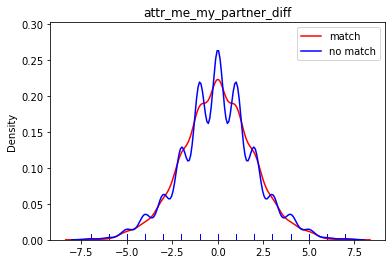

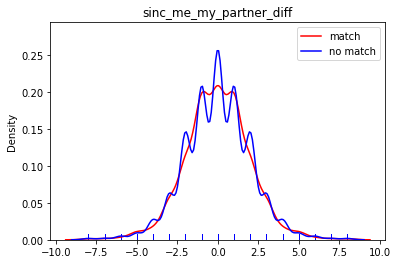

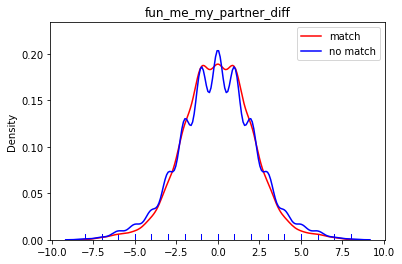

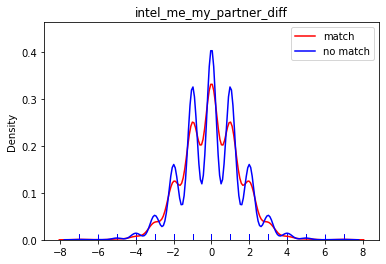

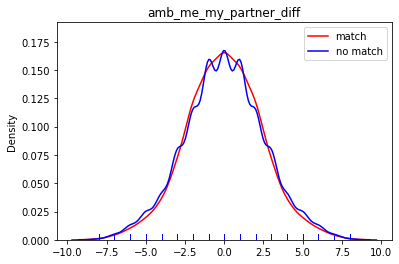

In [40]:
def print_graph(comparision_df_match,comparision_df_not_match,col_name):
    sns.distplot(comparision_df_match[[col_name]], hist=False, rug=True, color='red', label='match')
    sns.distplot(comparision_df_not_match[[col_name]], hist=False, rug=True, color='blue', label='no match')
    plt.legend()
    plt.title(col_name)
    plt.show()
    
for i in ['attr_me_my_partner_diff','sinc_me_my_partner_diff','fun_me_my_partner_diff','intel_me_my_partner_diff',
    'amb_me_my_partner_diff']:
    print_graph(comparision_df_match,comparision_df_not_match,i)

### How big is the difference between participant's preferences and their matched partner's preferences?
On a scale of 0-9 (0=no difference, 9=extreme difference)

array([[<AxesSubplot:title={'center':'attr_me_pref_my_partner_pref_diff'}>,
        <AxesSubplot:title={'center':'sinc_me_pref_my_partner_pref_diff'}>],
       [<AxesSubplot:title={'center':'fun_me_pref_my_partner_pref_diff'}>,
        <AxesSubplot:title={'center':'intel_me_pref_my_partner_pref_diff'}>],
       [<AxesSubplot:title={'center':'amb_me_pref_my_partner_pref_diff'}>,
        <AxesSubplot:>]], dtype=object)

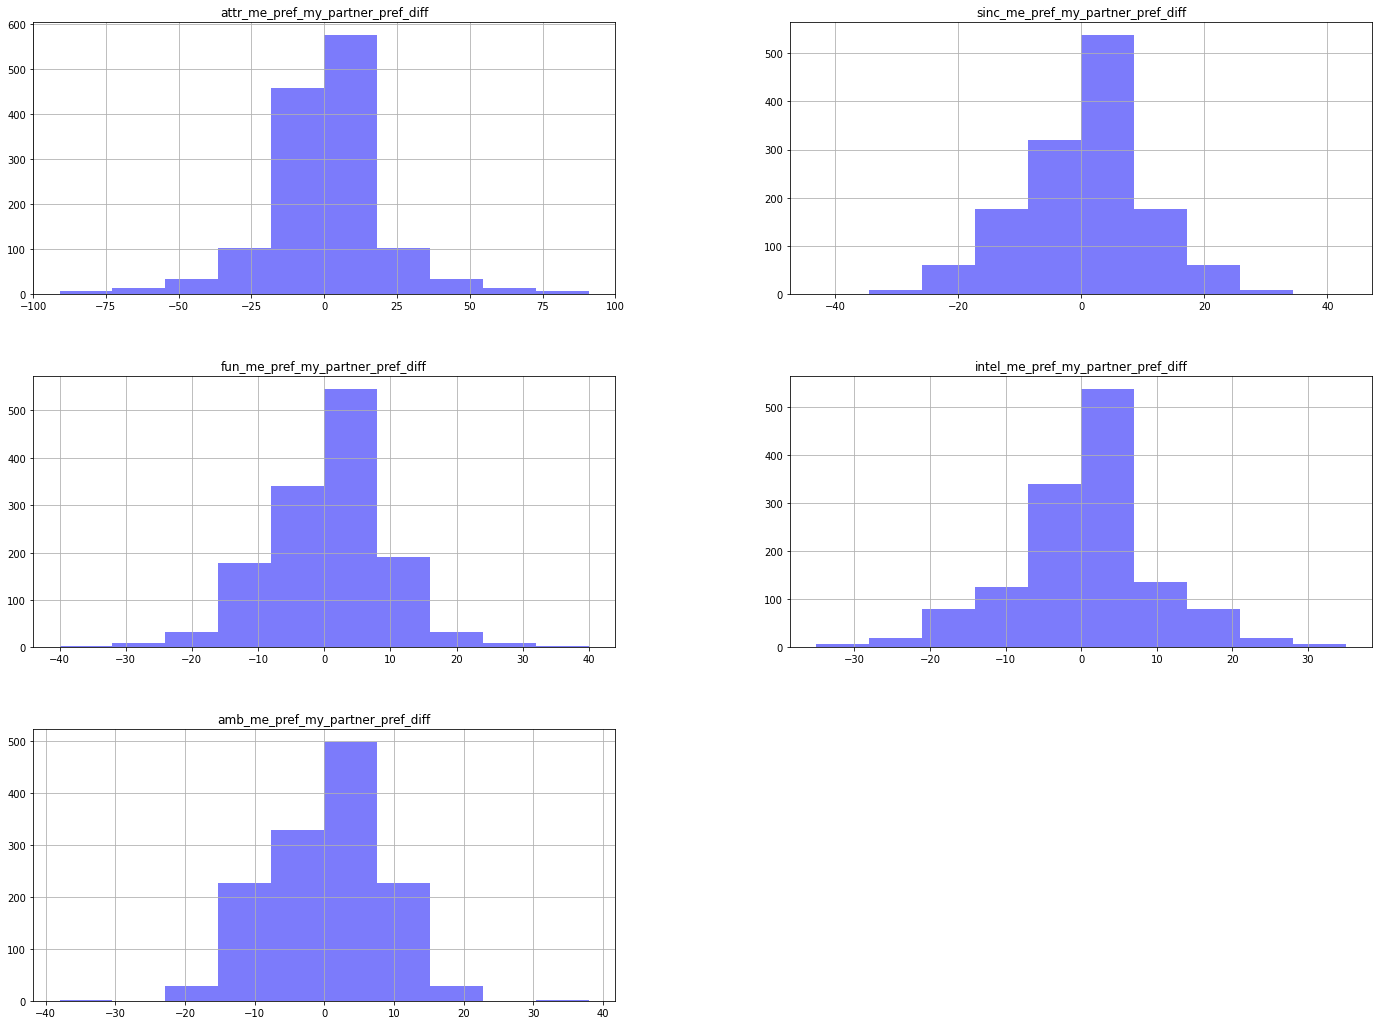

In [41]:
df_temp_match['attr_me_pref_my_partner_pref_diff'] = df_temp_match['attr_pref'] - df_temp_match['attr_pref_partners']
df_temp_match['sinc_me_pref_my_partner_pref_diff'] = df_temp_match['sinc_pref'] - df_temp_match['sinc_pref_partners']
df_temp_match['fun_me_pref_my_partner_pref_diff'] = df_temp_match['fun_pref'] - df_temp_match['fun_pref_partners']
df_temp_match['intel_me_pref_my_partner_pref_diff'] = df_temp_match['intel_pref'] - df_temp_match['intel_pref_partners']
df_temp_match['amb_me_pref_my_partner_pref_diff'] = df_temp_match['amb_pref'] - df_temp_match['amb_pref_partners']


df_temp_match[[
    'attr_me_pref_my_partner_pref_diff','sinc_me_pref_my_partner_pref_diff','fun_me_pref_my_partner_pref_diff',
    'intel_me_pref_my_partner_pref_diff', 'amb_me_pref_my_partner_pref_diff'
]].hist(figsize=(24,18), color = purple)

## Hobbies

### How important are hobbies to participants?
On a scale of 1-10 (1=not at all important, 10=extremely important)

array([[<AxesSubplot:title={'center':'sports'}>,
        <AxesSubplot:title={'center':'tvsports'}>],
       [<AxesSubplot:title={'center':'exercise'}>,
        <AxesSubplot:title={'center':'dining'}>],
       [<AxesSubplot:title={'center':'museums'}>,
        <AxesSubplot:title={'center':'art'}>],
       [<AxesSubplot:title={'center':'hiking'}>,
        <AxesSubplot:title={'center':'gaming'}>],
       [<AxesSubplot:title={'center':'clubbing'}>,
        <AxesSubplot:title={'center':'reading'}>],
       [<AxesSubplot:title={'center':'tv'}>,
        <AxesSubplot:title={'center':'theater'}>],
       [<AxesSubplot:title={'center':'movies'}>,
        <AxesSubplot:title={'center':'concerts'}>],
       [<AxesSubplot:title={'center':'music'}>,
        <AxesSubplot:title={'center':'shopping'}>],
       [<AxesSubplot:title={'center':'yoga'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

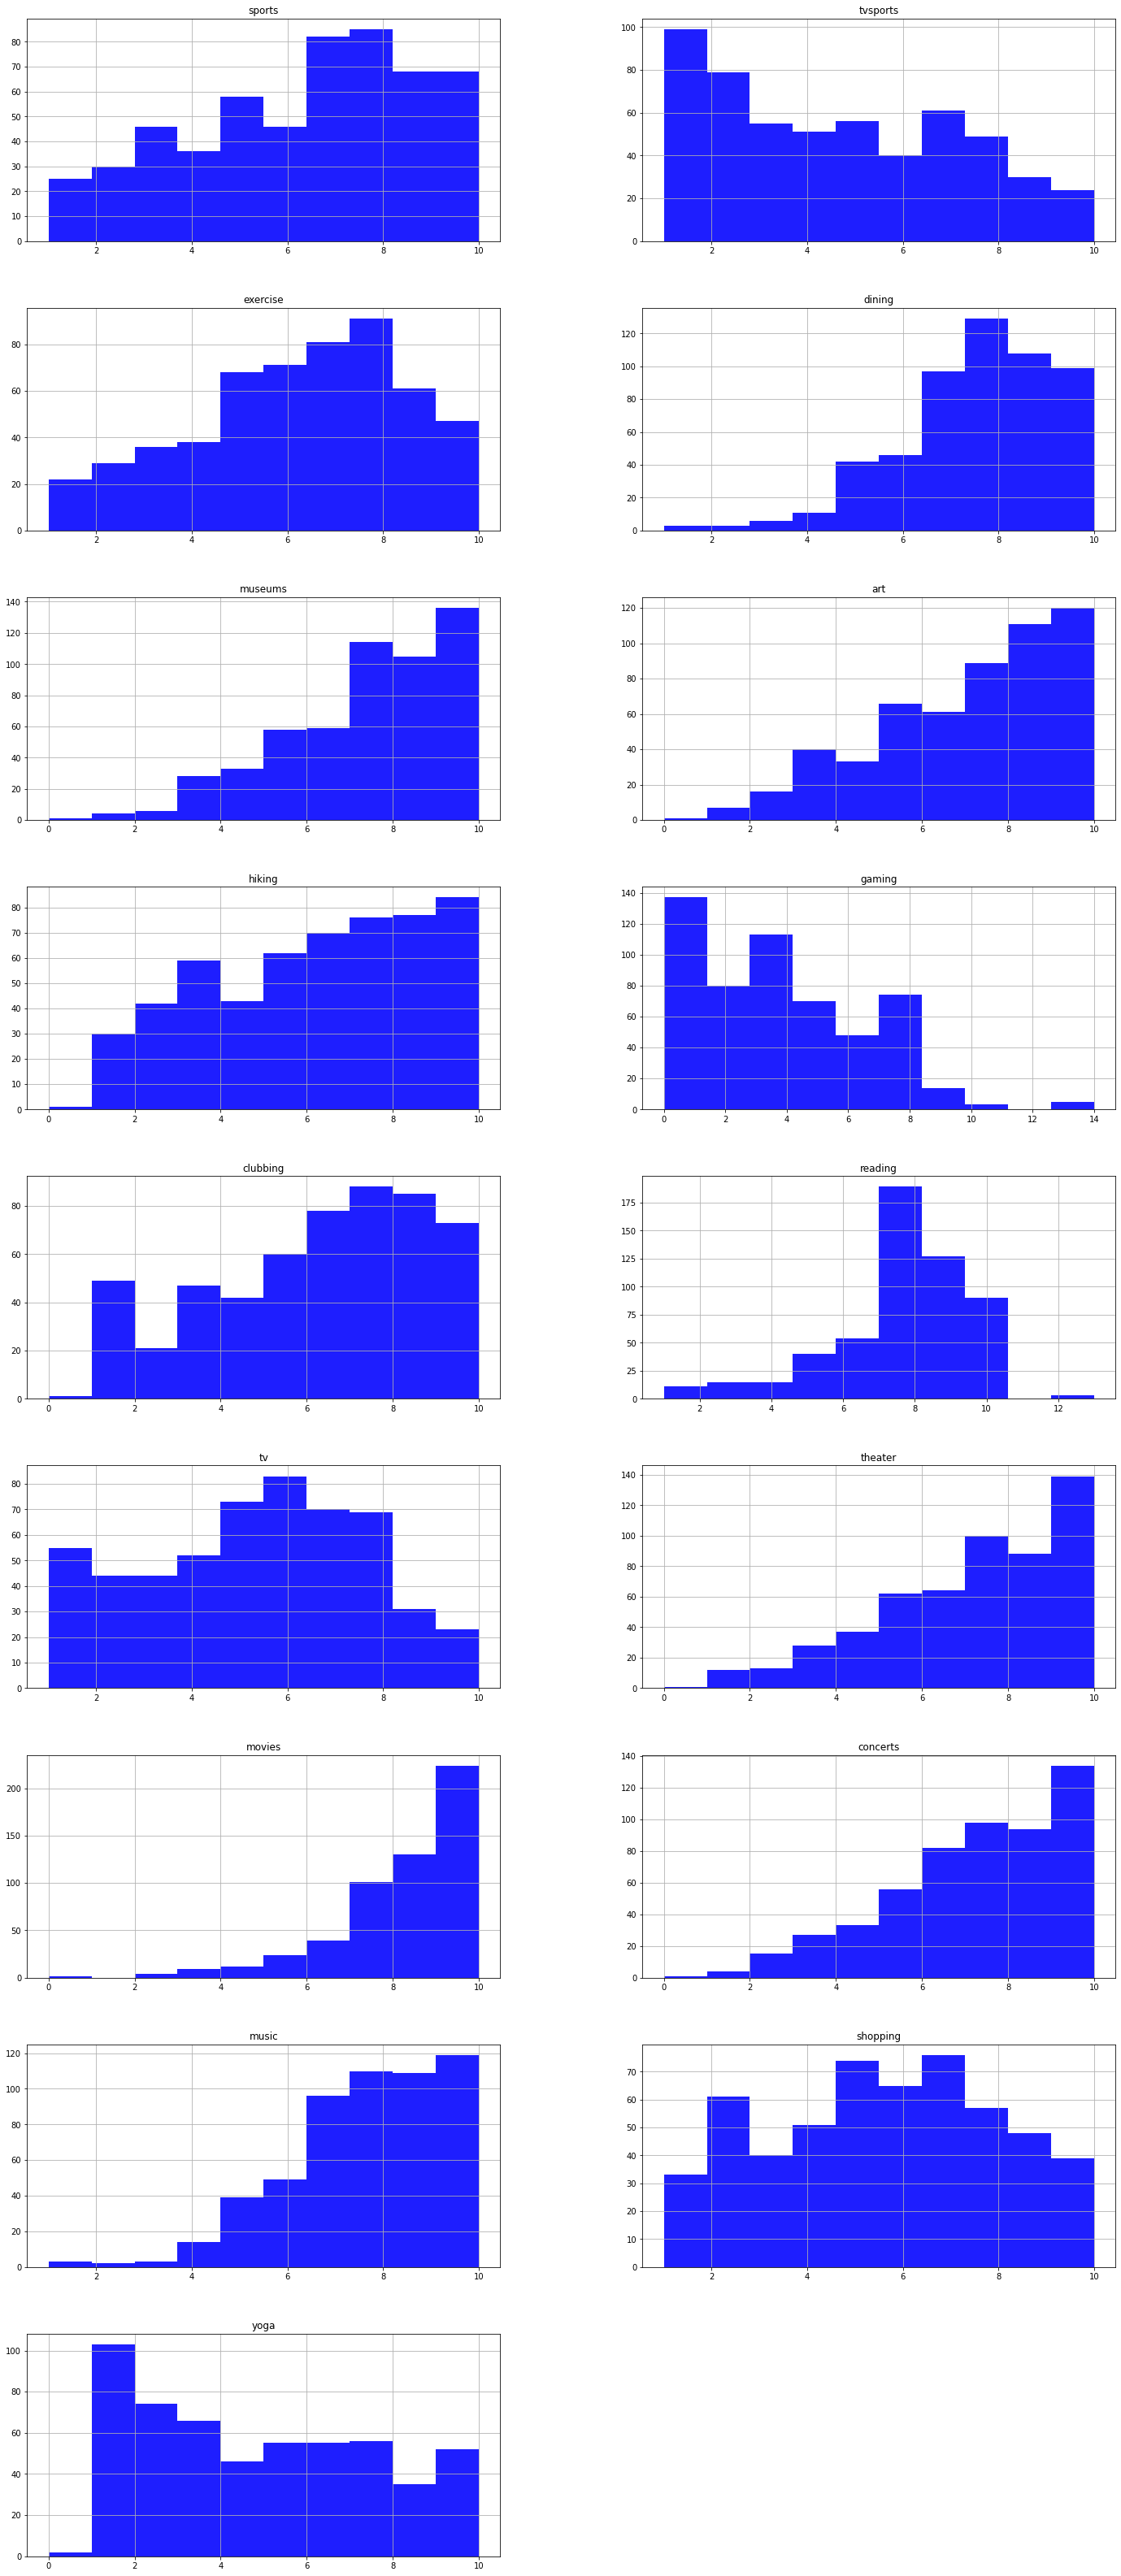

In [42]:
comparision_df = df[['iid',
    'sports','tvsports','exercise','dining','museums','art','hiking','gaming',
    'clubbing','reading','tv','theater', 'movies','concerts','music','shopping','yoga',
]].drop_duplicates()

comparision_df[[
    'sports','tvsports','exercise','dining','museums','art','hiking','gaming',
    'clubbing','reading','tv','theater', 'movies','concerts','music','shopping','yoga',
]].hist(figsize=(24,64), layout=(10,2), color = blue)

### How big is the difference between participant's importance of hobbies and their matched partner importance of hobbies?
On a scale of 0-9 (0=no difference, 9=extreme difference)

In [43]:
df['sports_me_my_partner_diff'] = df['sports'] - df['sports_partners']
df['tvsports_me_my_partner_diff'] = abs(df['tvsports'] - df['tvsports_partners'])
df['exercise_me_my_partner_diff'] = abs(df['exercise'] - df['exercise_partners'])
df['dining_me_my_partner_diff'] = abs(df['dining'] - df['dining_partners'])
df['museums_me_my_partner_diff'] = abs(df['museums'] - df['museums_partners'])
df['art_me_my_partner_diff'] = abs(df['art'] - df['art_partners'])
df['hiking_me_my_partner_diff'] = abs(df['hiking'] - df['hiking_partners'])
df['gaming_me_my_partner_diff'] = abs(df['gaming'] - df['gaming_partners'])
df['clubbing_me_my_partner_diff'] = abs(df['clubbing'] - df['clubbing_partners'])
df['reading_me_my_partner_diff'] = abs(df['reading'] - df['reading_partners'])
df['tv_me_my_partner_diff'] = abs(df['tv'] - df['tv_partners'])
df['theater_me_my_partner_diff'] = abs(df['theater'] - df['theater_partners'])
df['movies_me_my_partner_diff'] = abs(df['movies'] - df['movies_partners'])
df['concerts_me_my_partner_diff'] = abs(df['concerts'] - df['concerts_partners'])
df['music_me_my_partner_diff'] = abs(df['music'] - df['music_partners'])
df['shopping_me_my_partner_diff'] = abs(df['shopping'] - df['shopping_partners'])
df['yoga_me_my_partner_diff'] = abs(df['yoga'] - df['yoga_partners'])

array([[<AxesSubplot:title={'center':'sports_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'tvsports_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'exercise_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'dining_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'museums_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'art_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'hiking_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'gaming_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'clubbing_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'reading_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'tv_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'theater_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'movies_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'concerts_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':

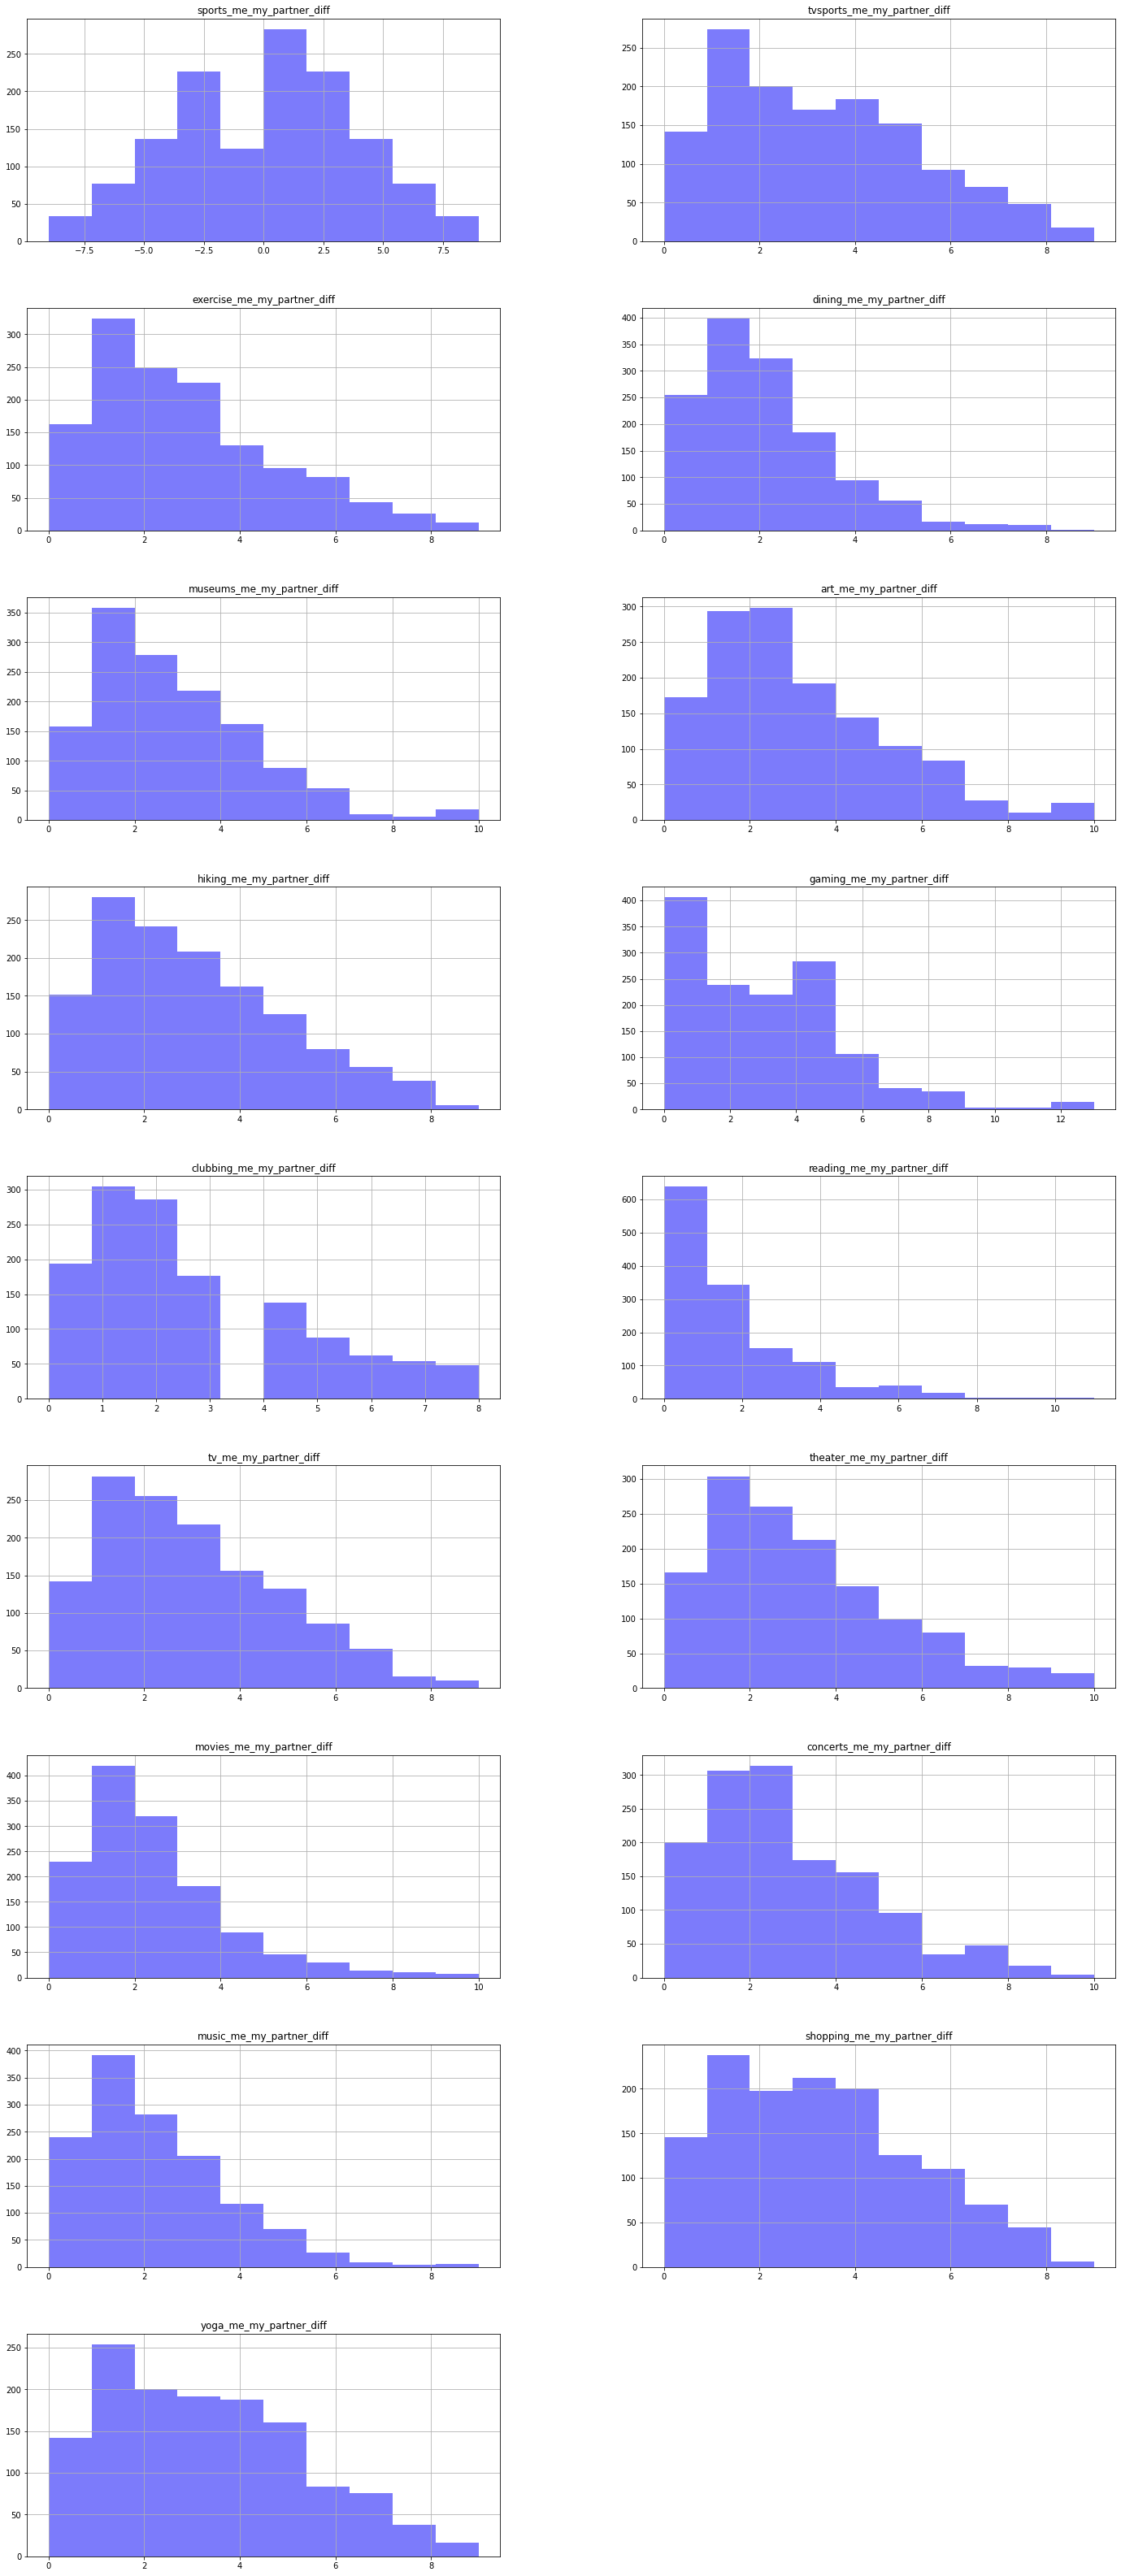

In [44]:
df_temp = df[df['match']==1]

comparision_df = df_temp[['iid','pid',
    'sports_me_my_partner_diff','tvsports_me_my_partner_diff','exercise_me_my_partner_diff','dining_me_my_partner_diff',
    'museums_me_my_partner_diff','art_me_my_partner_diff','hiking_me_my_partner_diff','gaming_me_my_partner_diff',
    'clubbing_me_my_partner_diff','reading_me_my_partner_diff','tv_me_my_partner_diff','theater_me_my_partner_diff',
    'movies_me_my_partner_diff','concerts_me_my_partner_diff','music_me_my_partner_diff','shopping_me_my_partner_diff',
    'yoga_me_my_partner_diff',
]].drop_duplicates()

comparision_df[[
    'sports_me_my_partner_diff','tvsports_me_my_partner_diff','exercise_me_my_partner_diff','dining_me_my_partner_diff',
    'museums_me_my_partner_diff','art_me_my_partner_diff','hiking_me_my_partner_diff','gaming_me_my_partner_diff',
    'clubbing_me_my_partner_diff','reading_me_my_partner_diff','tv_me_my_partner_diff','theater_me_my_partner_diff',
    'movies_me_my_partner_diff','concerts_me_my_partner_diff','music_me_my_partner_diff','shopping_me_my_partner_diff',
    'yoga_me_my_partner_diff',
]].hist(figsize=(24,64), layout=(10,2), color = purple)

#### Distribution of difference between participant's importance of hobbies and their date's importance of hobbies according to match

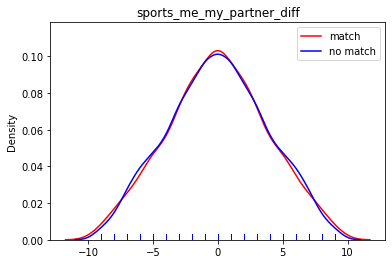

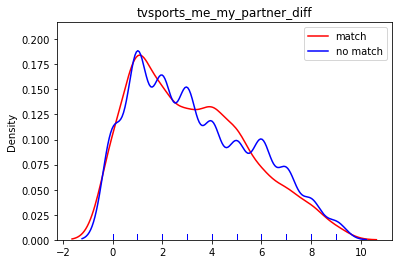

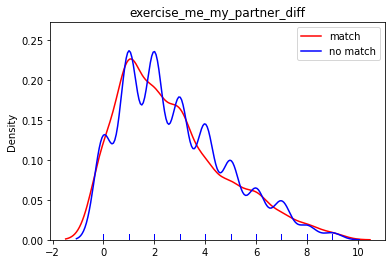

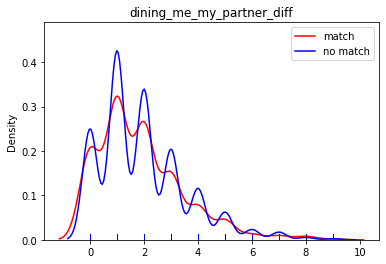

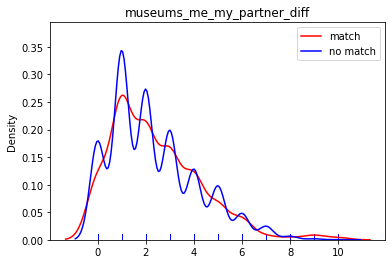

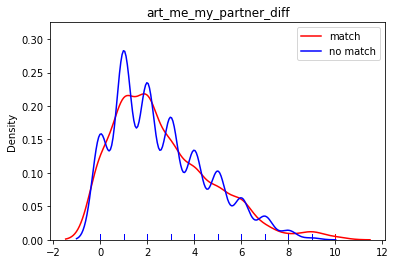

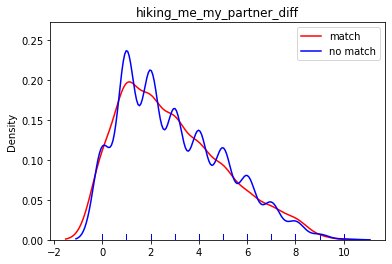

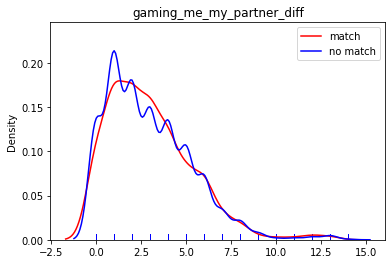

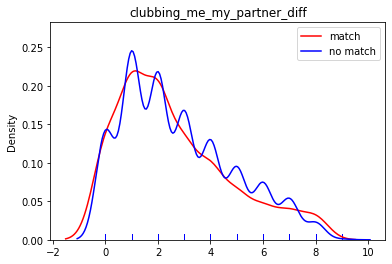

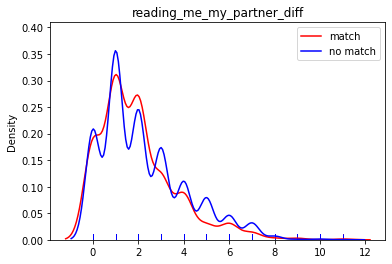

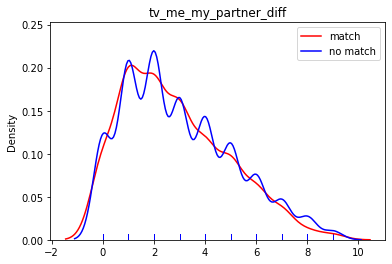

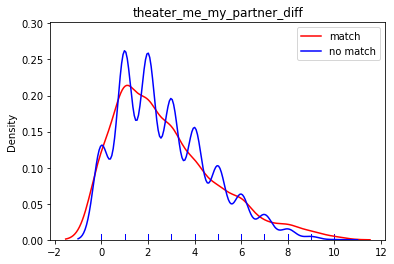

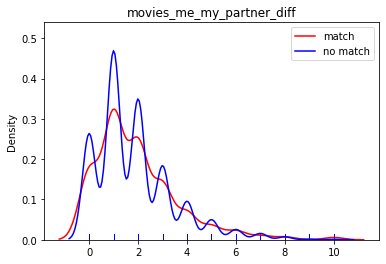

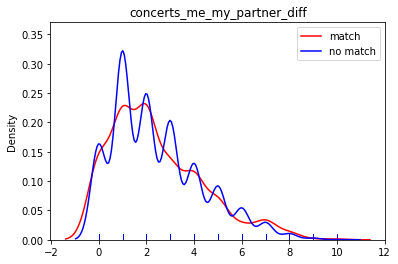

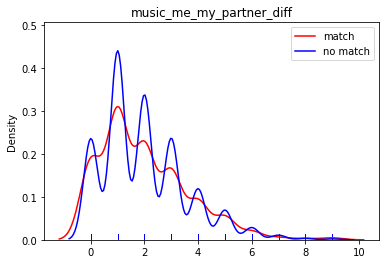

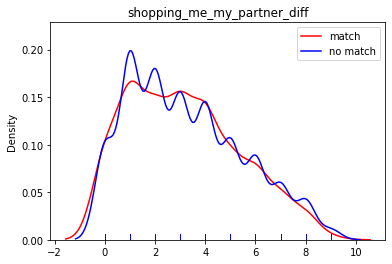

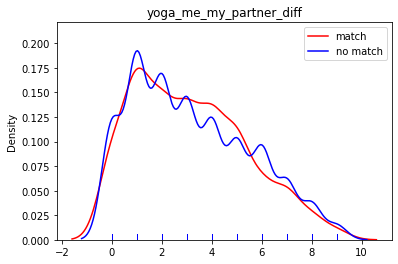

In [45]:
mat = df[df['match']==1]
not_ma = df[df['match']==0]

for i in ['sports_me_my_partner_diff',
    'tvsports_me_my_partner_diff',
    'exercise_me_my_partner_diff',
    'dining_me_my_partner_diff',
    'museums_me_my_partner_diff',
    'art_me_my_partner_diff',
    'hiking_me_my_partner_diff',
    'gaming_me_my_partner_diff',
    'clubbing_me_my_partner_diff',
    'reading_me_my_partner_diff',
    'tv_me_my_partner_diff',
    'theater_me_my_partner_diff',
    'movies_me_my_partner_diff',
    'concerts_me_my_partner_diff',
    'music_me_my_partner_diff',
    'shopping_me_my_partner_diff',
    'yoga_me_my_partner_diff'
 ]:
    print_graph(mat, not_ma, i)

### Do women care more about the difference between their importance of hobbies and their matched partner importance of hobbies?

array([[<AxesSubplot:title={'center':'sports_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'tvsports_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'exercise_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'dining_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'museums_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'art_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'hiking_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'gaming_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'clubbing_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'reading_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'tv_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'theater_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':'movies_me_my_partner_diff'}>,
        <AxesSubplot:title={'center':'concerts_me_my_partner_diff'}>],
       [<AxesSubplot:title={'center':

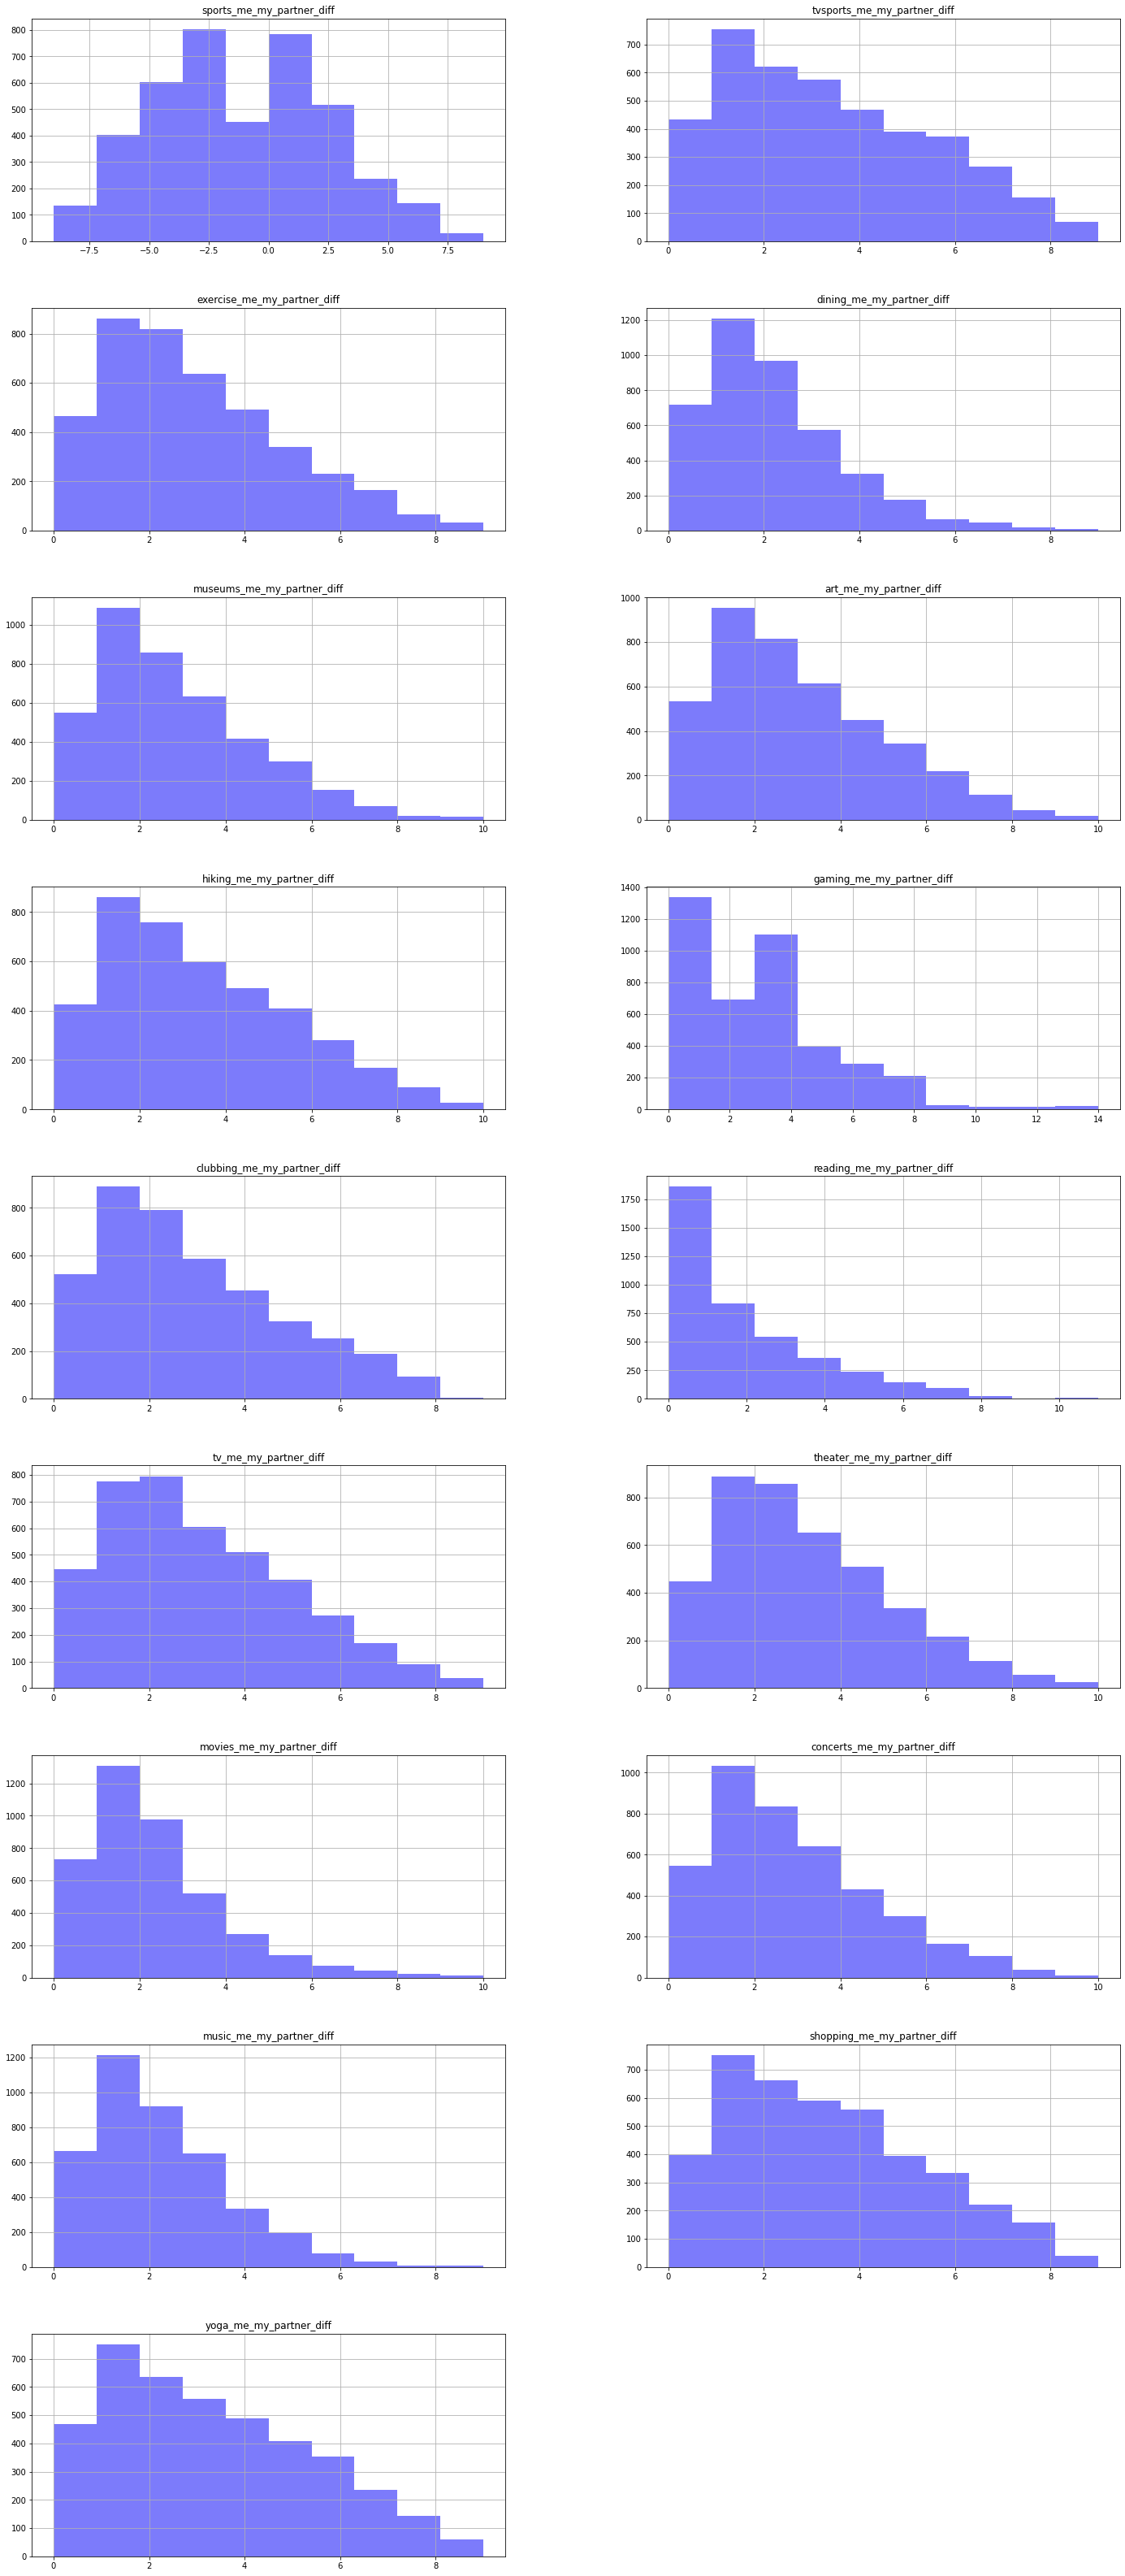

In [46]:
df_temp = df[df['match']==1]
df_temp = df[df['gender']==0]

comparision_df = df_temp[['iid','pid',
    'sports_me_my_partner_diff',
    'tvsports_me_my_partner_diff',
    'exercise_me_my_partner_diff',
    'dining_me_my_partner_diff',
    'museums_me_my_partner_diff',
    'art_me_my_partner_diff',
    'hiking_me_my_partner_diff',
    'gaming_me_my_partner_diff',
    'clubbing_me_my_partner_diff',
    'reading_me_my_partner_diff',
    'tv_me_my_partner_diff',
    'theater_me_my_partner_diff',
    'movies_me_my_partner_diff',
    'concerts_me_my_partner_diff',
    'music_me_my_partner_diff',
    'shopping_me_my_partner_diff',
    'yoga_me_my_partner_diff',
]].drop_duplicates()

comparision_df[[
    'sports_me_my_partner_diff',
    'tvsports_me_my_partner_diff',
    'exercise_me_my_partner_diff',
    'dining_me_my_partner_diff',
    'museums_me_my_partner_diff',
    'art_me_my_partner_diff',
    'hiking_me_my_partner_diff',
    'gaming_me_my_partner_diff',
    'clubbing_me_my_partner_diff',
    'reading_me_my_partner_diff',
    'tv_me_my_partner_diff',
    'theater_me_my_partner_diff',
    'movies_me_my_partner_diff',
    'concerts_me_my_partner_diff',
    'music_me_my_partner_diff',
    'shopping_me_my_partner_diff',
    'yoga_me_my_partner_diff',
]].hist(figsize=(24,64), layout=(10,2), color = purple)